# Diabetes Prediction for females

# using Random Forest Classifier

In [4]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [6]:
ds = pd.read_csv("C:\\Users\\hp-pc\\Desktop\\ML\\diabetes.csv")

In [7]:
ds.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [8]:
#count the missing value
ds.isna().sum()
#there's no missing value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#no. of females that have diabetes and have not
ds['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

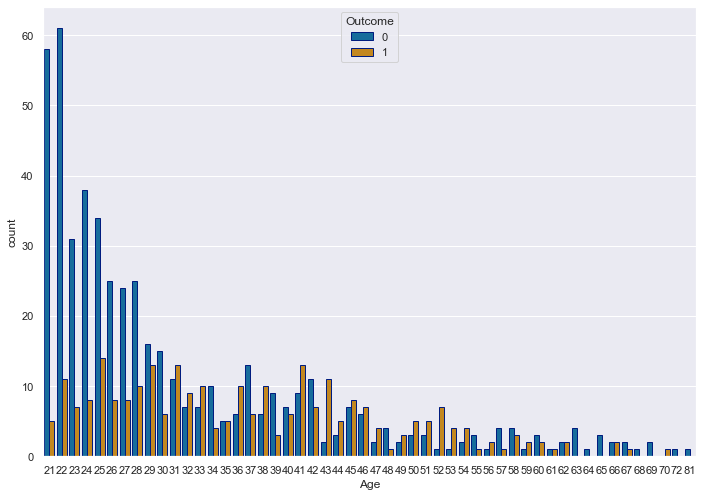

In [10]:
#Visualise no. of females who have and have not diabetes according to their age
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='Age', hue='Outcome', data=ds, palette='colorblind', edgecolor= sns.color_palette('dark', n_colors=1))

In [7]:
#split the data
x = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [8]:
#75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [1]:
#feature scaling between 0,1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

NameError: name 'StandardScaler' is not defined

In [10]:
#Random Forest classifier
forest = RandomForestClassifier(n_estimators= 10, criterion = 'entropy', random_state=1)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [11]:
#test the model accuracy for the train
model = forest
model.score(X_train, Y_train)

0.9993333333333333

In [21]:
from sklearn.metrics import classification_report

cm = confusion_matrix(Y_test, model.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Accuracy = {}'.format( (TP+TN)/(TP+TN+FN+FP) ))
print(classification_report(Y_test, model.predict(X_test)))

[[325  12]
 [ 27 136]]
Model Accuracy = 0.922
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       337
           1       0.92      0.83      0.87       163

    accuracy                           0.92       500
   macro avg       0.92      0.90      0.91       500
weighted avg       0.92      0.92      0.92       500



# using SVM classifier

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
dataset = pd.read_csv("/Users/arwa/Desktop/AI/diabetes.csv")

In [25]:
dataset.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0


In [26]:
x= dataset.iloc[:,:-1].values #data
y= dataset.iloc[:,-1].values #label

In [27]:
X_train, X_test, Y_train, Y_test =train_test_split(x, y, test_size=0.25, random_state=1)

In [28]:
#feature scaling between 0,1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
clf= svm.SVC(kernel='linear' , C=1)
clf.fit(X_train,Y_train)#training 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
clfcp= clf
clfcp.score(X_train, Y_train)

0.7773333333333333

In [31]:
cm= confusion_matrix(Y_test, clfcp.predict(X_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print(cm)
print("Accuracy = {}".format((TN+TP)/(TP+TN+FN+FP)))
print(classification_report(Y_test ,clfcp.predict(X_test)))

[[297  40]
 [ 68  95]]
Accuracy = 0.784
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       337
           1       0.70      0.58      0.64       163

    accuracy                           0.78       500
   macro avg       0.76      0.73      0.74       500
weighted avg       0.78      0.78      0.78       500

